## Import required libraries

In [4]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 610.7 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/anush/Downloads/Traffic-Sign-Recognition-using-CNN-and-Keras')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [4]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [5]:
cur_path

'C:\\Users\\anush\\Downloads\\Traffic-Sign-Recognition-using-CNN-and-Keras'

## Preprocessing the images

In [7]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [10]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 236s 116ms/step - accuracy: 0.4915 - loss: 2.2697 - val_accuracy: 0.9580 - val_loss: 0.1662
Epoch 2/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 188s 78ms/step - accuracy: 0.9116 - loss: 0.3219 - val_accuracy: 0.9802 - val_loss: 0.0759
Epoch 3/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 104s 53ms/step - accuracy: 0.9399 - loss: 0.2249 - val_accuracy: 0.9857 - val_loss: 0.0535
Epoch 4/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 131s 67ms/step - accuracy: 0.9496 - loss: 0.1932 - val_accuracy: 0.9850 - val_loss: 0.0589
Epoch 5/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 193s 93ms/step - accuracy: 0.9472 - loss: 0.2050 - val_accuracy: 0.9899 - val_loss: 0.0385
Epoch 6/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 134s 68ms/step - accuracy: 0.9480 - loss: 0.2047 - val_accuracy: 0.9914 - val_loss: 0.0303
Epoch 7/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 118s 60ms/step - accuracy: 0.9576 - loss: 0.1745 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 8/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 114s 58ms/step - accuracy:

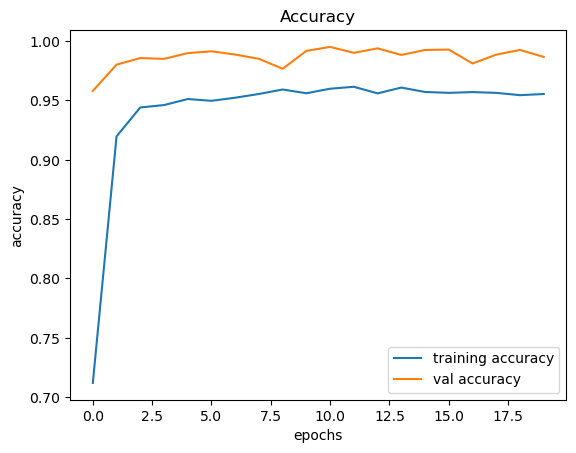

In [19]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

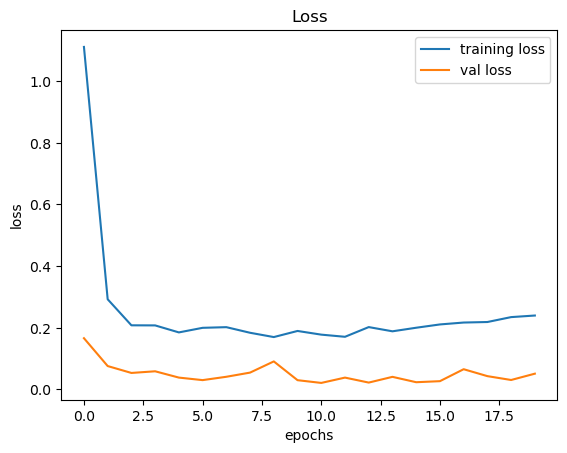

In [20]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing on Test data

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
X_test, label = testing('Test.csv')

In [24]:
# Get the predicted probabilities
Y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Display predictions
print(Y_pred)


395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step
[16  1 38 ... 15  7 10]


## Accuracy with the test data

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9531274742676168


## Save the model

In [26]:
model.save("./training/TSR.h5")

## Load the Model

In [28]:
import os
os.chdir(r'C:/Users/anush/Downloads/Traffic-Sign-Recognition-using-CNN-and-Keras')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [29]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [34]:
def test_on_img(img_path):
    data = []
    image = Image.open(img_path)
    image = image.resize((30, 30))  # Resize to the input size of the model
    data.append(np.array(image))
    
    # Convert to NumPy array
    X_test = np.array(data)
    
    # Predict probabilities
    Y_pred_prob = model.predict(X_test)
    
    # Get the predicted class
    Y_pred = np.argmax(Y_pred_prob, axis=1)
    
    return image, Y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted traffic sign is: Speed limit (80km/h)


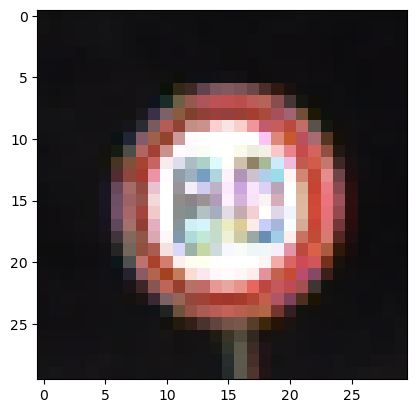

In [41]:
plot, prediction = test_on_img(r'C:/Users/anush/Downloads/Traffic-Sign-Recognition-using-CNN-and-Keras/Test/12047.png')
predicted_class = int(prediction[0])  # Extract the integer class label
print("Predicted traffic sign is:", classes[predicted_class])
plt.imshow(plot)
plt.show()


In [38]:

from sklearn.metrics import classification_report, accuracy_score

# Assuming Y_true is the true labels and Y_pred is obtained from the model's predictions
print("Accuracy:", accuracy_score(Y_true, Y_pred))
print("\nClassification Report:\n", classification_report(Y_true, Y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       701
           2       1.00      1.00      1.00       755
           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       670
           5       1.00      1.00      1.00       659
           6       1.00      1.00      1.00       115
           7       1.00      1.00      1.00       426
           8       1.00      1.00      1.00       480
           9       1.00      1.00      1.00       509
          10       1.00      1.00      1.00       673
          11       1.00      1.00      1.00       433
          12       1.00      1.00      1.00       676
          13       1.00      1.00      1.00       716
          14       1.00      1.00      1.00       272
          15       1.00      1.00      1.00       253
          16       1.00      1.00      1.0